In [1]:
from functions_AITEX.layers import LayerX, LayerY
from functions_AITEX.LayerSinX import LayerSinX
from functions_AITEX.LayerSinY import LayerSinY
import matplotlib.pyplot as plt

In [2]:
Nx_sq = 1
Ny_sq = 1
r  = 2.5

# ==================
Nx_sq_db = 2*Nx_sq
Ny_sq_db = 2*Ny_sq

Nx = 3*Nx_sq_db
Ny = 3*Nx_sq_db

Lx = 2*r*Nx_sq_db
Ly = 2*r*Ny_sq_db

trajs_X = LayerX(Lx, Ly, Nx)
trajs_Y = LayerY(Lx, Ly, Ny)
type = 'circle' # 'circle' or 'sin'

S_params = {'Nx'  : Nx_sq_db,
            'Ny'  : Ny_sq_db,
            'type': type,
            "r"   : r}

trajs_SX = LayerSinX(**S_params) 
trajs_SY = LayerSinY(**S_params)

In [3]:
def plot_design(design):
    colors = ['r','g','b','y']
    for trajs, color in zip(design, colors):
        for traj in trajs:
            plt.plot(traj[:,0],traj[:,1],color=color)


<Figure size 640x480 with 0 Axes>

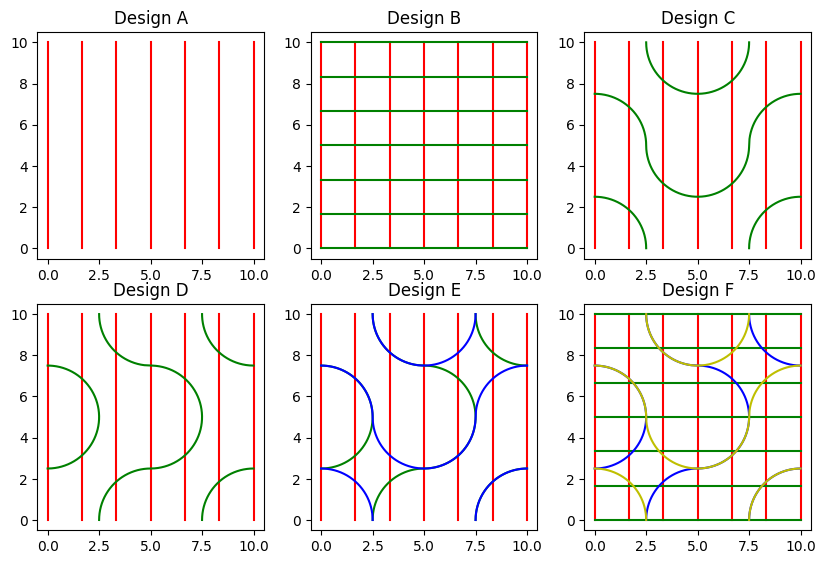

In [4]:
design_A = [trajs_X]
design_B = [trajs_X,trajs_Y]
design_C = [trajs_X,trajs_SX]
design_D = [trajs_X,trajs_SY]
design_E = [trajs_X,trajs_SY,trajs_SX]
design_F = [trajs_X,trajs_Y,trajs_SY,trajs_SX]

fig = plt.figure()
designs = [design_A,design_B,design_C,design_D,design_E,design_F]

nds_sq = len(designs)
nds = int(nds_sq**0.5) 
nds = nds if nds**2 >= nds_sq else nds+1

fig = plt.figure()
fig.set_size_inches(10,10)
for i,idesign in enumerate(designs):
    plt.subplot(nds,nds,i+1)
    plot_design(idesign)
    plt.title('Design %s' % chr(65+i))
    # aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')


In [5]:

import os,shutil
# remove output folder if exists
try: 
    shutil.rmtree("output")
except: 
    pass

# create output folder
os.makedirs("output")
os.makedirs("output/mesh")
os.makedirs("output/ccx")

In [6]:
from functions_AITEX.yarns import yarns

In [7]:
print("Lx = %s" % Lx)
print("Ly = %s" % Ly)

Lx = 10.0
Ly = 10.0


In [8]:
params_yarns ={
    "r":  0.2,
    "trajs_layers":design_D,
    "h" : 0.65,
    "z0": 2.82/2,
    "Lx": Lx,
    "Ly": Ly,
    "interface_factor": 1.75,
    "density":3,
    "with_interface":False,
}
yarns(params_yarns)

file:  output/mesh/layer_1_yarn_1_minus.brep
file:  output/mesh/layer_1_yarn_2_minus.brep
file:  output/mesh/layer_1_yarn_3_minus.brep
file:  output/mesh/layer_1_yarn_4_minus.brep
file:  output/mesh/layer_1_yarn_5_minus.brep
file:  output/mesh/layer_1_yarn_6_minus.brep
file:  output/mesh/layer_1_yarn_7_minus.brep
file:  output/mesh/layer_2_yarn_1_minus.brep
file:  output/mesh/layer_2_yarn_2_minus.brep
file:  output/mesh/layer_2_yarn_3_minus.brep
file:  output/mesh/layer_2_yarn_4_minus.brep
file:  output/mesh/layer_1_yarn_1_plus.brep
file:  output/mesh/layer_1_yarn_2_plus.brep
file:  output/mesh/layer_1_yarn_3_plus.brep
file:  output/mesh/layer_1_yarn_4_plus.brep
file:  output/mesh/layer_1_yarn_5_plus.brep
file:  output/mesh/layer_1_yarn_6_plus.brep
file:  output/mesh/layer_1_yarn_7_plus.brep
file:  output/mesh/layer_2_yarn_1_plus.brep
file:  output/mesh/layer_2_yarn_2_plus.brep
file:  output/mesh/layer_2_yarn_3_plus.brep
file:  output/mesh/layer_2_yarn_4_plus.brep


In [9]:
import gmsh

try:
    gmsh.finalize()
except:
    pass
import glob

h = params_yarns["h"]
z0 = 2*(params_yarns["z0"] - 0.5*h)
zL = h*(len(params_yarns["trajs_layers"]))*2 
zT = z0 + zL
radius = params_yarns["r"]

# load all the geometries
files_yarns = glob.glob("output/mesh/*.brep")


In [10]:
names = []
for file in files_yarns:

    name = os.path.abspath(file).split(os.sep)[-1].split(".")[0]

    # add physical group
    name = name.replace("yarn_","y")
    name = name.replace("layer_","l")
    # if "minus" in name MI prefix
    if "minus" in name:
        name = "MI_"+name
    if "plus" in name:
        name = "PL_"+name
    name = name.replace("_minus","")
    name = name.replace("_plus","")

    names.append(name)

# sorf 
names_idx = sorted(range(len(names)), key=lambda k: names[k])
names = [names[i] for i in names_idx]
files_yarns = [files_yarns[i] for i in names_idx]





In [11]:
names

['MI_l1_y1',
 'MI_l1_y2',
 'MI_l1_y3',
 'MI_l1_y4',
 'MI_l1_y5',
 'MI_l1_y6',
 'MI_l1_y7',
 'MI_l2_y1',
 'MI_l2_y2',
 'MI_l2_y3',
 'MI_l2_y4',
 'PL_l1_y1',
 'PL_l1_y2',
 'PL_l1_y3',
 'PL_l1_y4',
 'PL_l1_y5',
 'PL_l1_y6',
 'PL_l1_y7',
 'PL_l2_y1',
 'PL_l2_y2',
 'PL_l2_y3',
 'PL_l2_y4']

In [12]:
files_yarns

['output/mesh\\layer_1_yarn_1_minus.brep',
 'output/mesh\\layer_1_yarn_2_minus.brep',
 'output/mesh\\layer_1_yarn_3_minus.brep',
 'output/mesh\\layer_1_yarn_4_minus.brep',
 'output/mesh\\layer_1_yarn_5_minus.brep',
 'output/mesh\\layer_1_yarn_6_minus.brep',
 'output/mesh\\layer_1_yarn_7_minus.brep',
 'output/mesh\\layer_2_yarn_1_minus.brep',
 'output/mesh\\layer_2_yarn_2_minus.brep',
 'output/mesh\\layer_2_yarn_3_minus.brep',
 'output/mesh\\layer_2_yarn_4_minus.brep',
 'output/mesh\\layer_1_yarn_1_plus.brep',
 'output/mesh\\layer_1_yarn_2_plus.brep',
 'output/mesh\\layer_1_yarn_3_plus.brep',
 'output/mesh\\layer_1_yarn_4_plus.brep',
 'output/mesh\\layer_1_yarn_5_plus.brep',
 'output/mesh\\layer_1_yarn_6_plus.brep',
 'output/mesh\\layer_1_yarn_7_plus.brep',
 'output/mesh\\layer_2_yarn_1_plus.brep',
 'output/mesh\\layer_2_yarn_2_plus.brep',
 'output/mesh\\layer_2_yarn_3_plus.brep',
 'output/mesh\\layer_2_yarn_4_plus.brep']

In [13]:
gmsh.initialize()

yarns_vols = []

yarns_dict = {}
for name,file in zip(names,files_yarns):
    gmsh.merge(file)
    gmsh.model.occ.synchronize()

    all_vols = gmsh.model.getEntities(3)
    new_vols = [i for i in all_vols if i not in yarns_vols]
    
    yarns_dict[name] = new_vols
    yarns_vols += new_vols
    
    if params_yarns["with_interface"]:
        gmsh.model.addPhysicalGroup(3, [new_vols[1][1]] , tag=-1,name=name+"_interface")
        gmsh.model.addPhysicalGroup(3, [new_vols[0][1]] , tag=-1,name=name+"_yarn")

    else:
        gmsh.model.addPhysicalGroup(3, [new_vols[0][1]] , tag=-1,name=name+"_yarn")


In [14]:
yarns_dict

{'MI_l1_y1': [(3, 1)],
 'MI_l1_y2': [(3, 2)],
 'MI_l1_y3': [(3, 3)],
 'MI_l1_y4': [(3, 4)],
 'MI_l1_y5': [(3, 5)],
 'MI_l1_y6': [(3, 6)],
 'MI_l1_y7': [(3, 7)],
 'MI_l2_y1': [(3, 8)],
 'MI_l2_y2': [(3, 9)],
 'MI_l2_y3': [(3, 10)],
 'MI_l2_y4': [(3, 11)],
 'PL_l1_y1': [(3, 12)],
 'PL_l1_y2': [(3, 13)],
 'PL_l1_y3': [(3, 14)],
 'PL_l1_y4': [(3, 15)],
 'PL_l1_y5': [(3, 16)],
 'PL_l1_y6': [(3, 17)],
 'PL_l1_y7': [(3, 18)],
 'PL_l2_y1': [(3, 19)],
 'PL_l2_y2': [(3, 20)],
 'PL_l2_y3': [(3, 21)],
 'PL_l2_y4': [(3, 22)]}

In [15]:


gmsh.model.occ.synchronize()
# gmsh.fltk.run()
yarns_vols = gmsh.model.getEntities(3)

# box 
big_box = gmsh.model.occ.addBox(0, 0, -zT/2, 
                      Lx, Ly,zT)

mid_box = gmsh.model.occ.addBox(0 , 0 , -z0/2, 
                      Lx, Ly, z0)


# cut the box 
gmsh.model.occ.cut([(3, big_box)], [(3, mid_box)], removeTool=False)

gmsh.model.occ.synchronize()


In [16]:

box_vols = gmsh.model.getEntities(3)
box_vols = [i for i in box_vols if i not in yarns_vols]


In [17]:
box_vols

[(3, 24), (3, 25), (3, 26)]

In [18]:

final_obj_box = gmsh.model.occ.cut(box_vols, yarns_vols, removeTool=False)
# gmsh.fltk.run()

# cut the yarns 
final_obj_box = final_obj_box[0]
#center of mass 
gmsh.model.occ.synchronize()


In [19]:
final_obj_box

[(3, 24), (3, 25), (3, 26)]

In [20]:
COM = [ gmsh.model.occ.getCenterOfMass(3, ibox[1]) for ibox in final_obj_box]
# sort by z
id_com = sorted(range(len(COM)), key=lambda k: COM[k][2])
final_obj_box = [final_obj_box[i] for i in id_com]

names_box = ["box_minus","alma","box_plus"]

for name, ibox in zip(names_box,final_obj_box):
    gmsh.model.addPhysicalGroup(3, [ibox[1]], tag=-1,name=name)

In [21]:
from CompositeSandwich.box_labeling import box_labeling

In [22]:
final_obj_box

[(3, 25), (3, 24), (3, 26)]

In [23]:
box_labeling(final_obj_box[0][1],"minus")
box_labeling(final_obj_box[1][1],"alma")
box_labeling(final_obj_box[2][1],"plus")

{'x0': [266, 272],
 'xL': [269, 270],
 'y0': [267],
 'yL': [268],
 'z0': [258],
 'zL': [271]}

In [24]:
Ly

10.0

In [25]:
radius

0.2

In [26]:
#get all surface cuyo centro de mass este en el plano x=0
all_surfaces = gmsh.model.getEntities(2)

# get the center of mass of the surfaces
COM = [ gmsh.model.occ.getCenterOfMass(2, isurf[1]) for isurf in all_surfaces]

# tol 
COM = [ [round(i,1) for i in icom] for icom in COM]
planes = [
    ("x0_plane", 0, 1e-6, 0),  # (name, index to check, tolerance, offset)
    ("y0_plane", 1, 1e-6, 0),
    ("xL_plane", 0, 1e-6, Lx),
    ("yL_plane", 1, 1e-6, Ly)
]

# Iterar sobre cada plano especificado
surfaces_limits = []
for name, idx, tol, offset in planes:
    # Seleccionar superficies que están cerca del plano definido
    id_com = [i for i, com in enumerate(COM) if abs(com[idx] - offset) < tol]
    surfaces_limits.append(id_com)
    
    # Añadir grupo físico con las superficies seleccionadas
    gmsh.model.addPhysicalGroup(2, [all_surfaces[i][1] for i in id_com], tag=-1, name=name)




In [27]:
import numpy as np

box2maxlen = lambda box: np.max([
    box[3] - box[0], 
    box[4] - box[1], 
    box[5] - box[2]
])
gBB_surf = [box2maxlen(gmsh.model.occ.getBoundingBox(2, isurf[1]) )
            for isurf in all_surfaces]


In [28]:
x0_surfaces = surfaces_limits[0]
xL_surfaces = surfaces_limits[2]

COM_x0 = [COM[i] for i in x0_surfaces]
COM_xL = [COM[i] for i in xL_surfaces]

gBB_s_x0 = [gBB_surf[i] for i in x0_surfaces]
gBB_s_xL = [gBB_surf[i] for i in xL_surfaces]

# sort by y and z
id_com = sorted(range(len(COM_x0)), 
                key=lambda k: (COM_x0[k][2],
                               COM_x0[k][1],
                               gBB_s_x0[k]))

x0_surfaces = [x0_surfaces[i] for i in id_com]
COM_x0      = [COM_x0[i] for i in id_com]


id_com = sorted(range(len(COM_xL)), 
                key=lambda k: (COM_xL[k][2],
                               COM_xL[k][1],
                               gBB_s_xL[k]))

xL_surfaces = [xL_surfaces[i] for i in id_com]
COM_xL      = [COM_xL[i] for i in id_com]



In [29]:
%matplotlib ipympl

Text(0.5, 0.5, 'y')

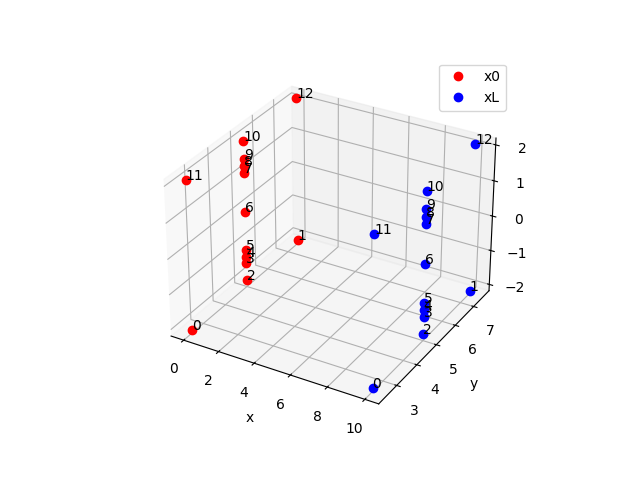

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
# 3d 
ax = fig.add_subplot(111, projection='3d')
plt.plot([i[0] for i in COM_x0],
         [i[1] for i in COM_x0],
         [i[2] for i in COM_x0],'ro',label="x0")

# text 
for i, txt in enumerate(x0_surfaces):
    ax.text(COM_x0[i][0],COM_x0[i][1],COM_x0[i][2], i)

plt.plot([i[0] for i in COM_xL],
         [i[1] for i in COM_xL],
         [i[2] for i in COM_xL],'bo',label="xL")

# text
for i, txt in enumerate(xL_surfaces):
    ax.text(COM_xL[i][0],COM_xL[i][1],COM_xL[i][2], i)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")


In [31]:
Lx

10.0

In [32]:
distance = [
    np.sqrt((COM_x0[i][0] - COM_xL[i][0])**2 + \
            (COM_x0[i][1] - COM_xL[i][1])**2 + \
            (COM_x0[i][2] - COM_xL[i][2])**2)
    for i in range(len(COM_x0))
]

# distance = [
#     np.sqrt((COM_x0[i][1] - COM_xL[i][1])**2 + \
#             (COM_x0[i][2] - COM_xL[i][2])**2)
#     for i in range(len(COM_x0))
# ]

In [33]:
distance

[np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0),
 np.float64(10.0)]

In [34]:
np.max(distance)

np.float64(10.0)

In [35]:
Lx

10.0

In [36]:
d = gmsh.model.occ.getDistance(2,x0_surfaces[1],2,xL_surfaces[1])
d

(8.406411633930968,
 0.759364002752023,
 7.59101182238102,
 -2.06,
 9.164282913212997,
 7.432598856796029,
 -2.06)

In [37]:
t = [ 1, 0, 0, -Lx ,\
      0, 1, 0, 0   ,\
      0, 0, 1, 0   ,\
      0, 0, 0, 0    ]

for ix0, ixL in zip(x0_surfaces, xL_surfaces):
    gmsh.model.mesh.setPeriodic(2, [all_surfaces[ix0][1]], [all_surfaces[ixL][1]], t)

In [38]:
# physical group index x0_1 x0_2 x0_3 ...

for i, isurf in enumerate(x0_surfaces):
    gmsh.model.addPhysicalGroup(2, [all_surfaces[isurf][1]], tag=-1, name="x0_%s" % (i+1))

for i, isurf in enumerate(xL_surfaces):
    gmsh.model.addPhysicalGroup(2, [all_surfaces[isurf][1]], tag=-1, name="xL_%s" % (i+1))

In [39]:
xL_surfaces[0]

44

In [40]:
x0_surfaces[0]

56

In [41]:
# distance between the surfaces



In [42]:
d

(8.406411633930968,
 0.759364002752023,
 7.59101182238102,
 -2.06,
 9.164282913212997,
 7.432598856796029,
 -2.06)

In [43]:
# gmsh.fltk.run()

In [44]:
final_obj_box[0]

(3, 25)

In [45]:
final_obj_box[1]

(3, 24)

In [46]:

gmsh.model.occ.synchronize()
#



# gmsh.option.setNumber("Mesh.CharacteristicLengthMin", radius*0.5)
# gmsh.option.setNumber("Mesh.CharacteristicLengthMax", radius*1.2)


gmsh.option.setNumber("Mesh.CharacteristicLengthMin", radius*0.5)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", radius*2.0)

gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 20)
# gmsh.option.setNumber("Mesh.AngleSmoothNormals", 10)
# gmsh.option.setNumber("Mesh.Smoothing", 10)	
gmsh.option.setNumber("Mesh.Algorithm", 2)
gmsh.option.setNumber("Mesh.Optimize", 1)
gmsh.option.setNumber("Mesh.OptimizeNetgen", 1)
gmsh.option.setNumber("Mesh.HighOrderOptimize", 2)

gmsh.model.mesh.generate(3)
 

In [47]:

gmsh.model.mesh.setOrder(2)
# inp 
gmsh.write("output/ccx/semicylinder.inp")

gmsh.finalize()

In [48]:
from djccx.inp.inp import inp

In [49]:
inp_f = inp("output/ccx/semicylinder.inp")

In [50]:
PLANES = inp_f.select_regex(".*PLANE.*","elset")

In [51]:
X0_PLANE = [ ip for ip in PLANES if "X0" in ip.name][0]
Y0_PLANE = [ ip for ip in PLANES if "Y0" in ip.name][0]
XL_PLANE = [ ip for ip in PLANES if "XL" in ip.name][0]
YL_PLANE = [ ip for ip in PLANES if "YL" in ip.name][0]

In [52]:
from functions_AITEX.inp.CreateNsetFromElset import CreateNsetFromElset

In [53]:
X0_PLANE_NSET = CreateNsetFromElset(inp_f,X0_PLANE,name="X0_PLANE")
Y0_PLANE_NSET = CreateNsetFromElset(inp_f,Y0_PLANE,name="Y0_PLANE")
XL_PLANE_NSET = CreateNsetFromElset(inp_f,XL_PLANE,name="XL_PLANE")
YL_PLANE_NSET = CreateNsetFromElset(inp_f,YL_PLANE,name="YL_PLANE")

In [54]:
X0_PLANE_NSET

Card (*NSET) :X0_PLANE

In [55]:
inp_f.remove_by_type(1)
inp_f.remove_by_type(2)

In [56]:
from djccx.inp.cards.ElsetCard import ElsetofElsetCard
import numpy as np

def CreateElsetFromElsets(inp_f,elsets,name):
    all = [ element.name for element in elsets]
    elset = ElsetofElsetCard(name,all)
    inp_f.cards = np.append(inp_f.cards,elset)
    return elset

In [57]:
yarns_elsets = inp_f.select_regex(".*YARN.*","elset")
elset_yarns = CreateElsetFromElsets(inp_f,yarns_elsets,"YARNS")

box_elsets = inp_f.select_regex(".*BOX.*","elset")
boxs_elset = CreateElsetFromElsets(inp_f,box_elsets,"BOXS")

alma_elset = inp_f.select("ALMA","elset")

In [58]:
from validation.experimental import carbonfiber,resina

In [ ]:
inp_f.CreateContacts

In [59]:
carbon_data = carbonfiber()
resina_data = resina()

Ecarbon_MPa = carbon_data["carbon"].iloc[0]["Young Modulus (GPa)"]*1e3
poisson_carbon = carbon_data["poisson ratio"]

materials = {
    "matrix": { "E" : resina_data["young modulus [MPa]"], 
                "nu": resina_data["poisson ratio"] },
    "carbon": { "E" : Ecarbon_MPa, 
                "nu": poisson_carbon }
}

materials

{'matrix': {'E': 2549.7289999999994, 'nu': 0.265},
 'carbon': {'E': np.float64(230000.0), 'nu': 0.3}}

In [60]:
young = 2000e6
nu = 0.3

matrix_material = inp_f.CreateElasticMaterial("matrix",materials["matrix"]["E"],materials["matrix"]["nu"])
carbon_material = inp_f.CreateElasticMaterial("carbon",materials["carbon"]["E"],materials["carbon"]["nu"])


inp_f.CreateSolidSection(elset_yarns,carbon_material)
inp_f.CreateSolidSection(boxs_elset,matrix_material)
inp_f.CreateSolidSection(alma_elset,matrix_material)


Card (*SOLIDSECTION) :SOLID_SECTION

In [61]:
elset_yarns

Card (*ELSETOFELSET) :YARNS

In [62]:
boxs_elset.content

['BOX_MINUS', 'BOX_PLUS']

In [63]:
istep = inp_f.CreateStaticStep(nlgeom=False)

istep.CreateBoundary(Y0_PLANE_NSET,dim=2,displ=0)
istep.CreateBoundary(YL_PLANE_NSET,dim=2,displ=0.1)


*BOUNDARY
YL_PLANE, 2, 0.1

In [64]:
output_folder = "output/ccx"
inp_f.run(output_folder) 

Running Calculix at:  output/ccx
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\scripts\AITEX\output\ccx\out.txt
Command:
 mpiexec -n 4 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  8808 

Calculix finished



{'data':           node       x        y       z        D1        D2        D3  \
 node                                                                    
 1            1  0.0000  10.0000 -1.6100  0.019035  0.100000  0.002268   
 2            2  0.0000  10.0000 -1.2100  0.018540  0.100000  0.001076   
 3            3  0.0000   0.0000 -1.6100  0.019036  0.000000  0.002268   
 4            4  0.0000   0.0000 -1.2100  0.018541  0.000000  0.001075   
 5            5  0.0000  10.0000 -1.4100  0.018790  0.100000  0.001674   
 ...        ...     ...      ...     ...       ...       ...       ...   
 512550  512550  8.2208   4.2298  1.1928 -0.011538  0.042205 -0.002245   
 512551  512551  5.4417   2.2629  2.0975  0.001468  0.026312 -0.004932   
 512552  512552  1.3749   4.5429  1.2829  0.008208  0.045333 -0.005071   
 512553  512553  3.3641   3.7189  1.1825  0.004066  0.036924 -0.002512   
 512554  512554  1.4301   4.0845  1.3918  0.008930  0.040650 -0.005205   
 
              SXX        SYY

In [65]:
inp_f.cards

array([Card (None) :*HEADING, Card (*NODE) :*NODE,
       Card (*ELEMENT) :VOLUME1, Card (*ELEMENT) :VOLUME2,
       Card (*ELEMENT) :VOLUME3, Card (*ELEMENT) :VOLUME4,
       Card (*ELEMENT) :VOLUME5, Card (*ELEMENT) :VOLUME6,
       Card (*ELEMENT) :VOLUME7, Card (*ELEMENT) :VOLUME8,
       Card (*ELEMENT) :VOLUME9, Card (*ELEMENT) :VOLUME10,
       Card (*ELEMENT) :VOLUME11, Card (*ELEMENT) :VOLUME12,
       Card (*ELEMENT) :VOLUME13, Card (*ELEMENT) :VOLUME14,
       Card (*ELEMENT) :VOLUME15, Card (*ELEMENT) :VOLUME16,
       Card (*ELEMENT) :VOLUME17, Card (*ELEMENT) :VOLUME18,
       Card (*ELEMENT) :VOLUME19, Card (*ELEMENT) :VOLUME20,
       Card (*ELEMENT) :VOLUME21, Card (*ELEMENT) :VOLUME22,
       Card (*ELEMENT) :VOLUME24, Card (*ELEMENT) :VOLUME25,
       Card (*ELEMENT) :VOLUME26, Card (*ELSET) :MINUS_X0,
       Card (*ELSET) :MINUS_XL, Card (*ELSET) :MINUS_Y0,
       Card (*ELSET) :MINUS_YL, Card (*ELSET) :MINUS_Z0,
       Card (*ELSET) :MINUS_ZL, Card (*ELSET) :ALMA_X

In [66]:
inp_f.print("output/ccx/semicylinder_no_shells.inp")